         Data       Price
0   2017.06 월   91.577110
1   2017.07 월   91.808074
2   2017.08 월   92.056957
3   2017.09 월   92.173055
4   2017.10 월   92.300329
5   2017.11 월   92.518675
6   2017.12 월   92.712614
7   2018.01 월   92.949315
8   2018.02 월   93.134216
9   2018.03 월   92.982333
10  2018.04 월   92.654899
11  2018.05 월   92.275771
12  2018.06 월   92.054053
13  2018.07 월   92.099687
14  2018.08 월   92.357551
15  2018.09 월   92.697749
16  2018.10 월   92.912258
17  2018.11 월   92.886943
18  2018.12 월   92.686362
19  2019.01 월   92.208942
20  2019.02 월   91.568498
21  2019.03 월   90.992839
22  2019.04 월   90.702517
23  2019.05 월   90.571881
24  2019.06 월   90.516408
25  2019.07 월   90.533682
26  2019.08 월   90.665045
27  2019.09 월   90.816589
28  2019.10 월   91.141047
29  2019.11 월   91.512941
30  2019.12 월   92.047098
31  2020.01 월   92.706174
32  2020.02 월   92.932594
33  2020.03 월   93.084175
34  2020.04 월   93.186160
35  2020.05 월   93.244419
36  2020.06 월   93.464808
37  2020.07 

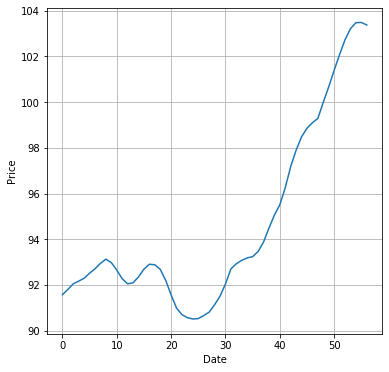

In [2]:
#%% Law Data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data.xlsx', encoding='UTF-8')
##df = df.drop(df.columns[0], axis=1)
df.columns = ["Data", "Price"]
print(df)

#dt = pd.read_excel('tax.xlsx', encoding='UTF-8')
#dt = dt.drop(dt.columns[0], axis=1)
#dt.columns = ["Data", "Tax"]
#print(dt)

plt.figure(figsize=(6,6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.plot(range(len(df["Data"])), df["Price"])
plt.savefig('서울_raw data.png')

<Figure size 432x288 with 0 Axes>

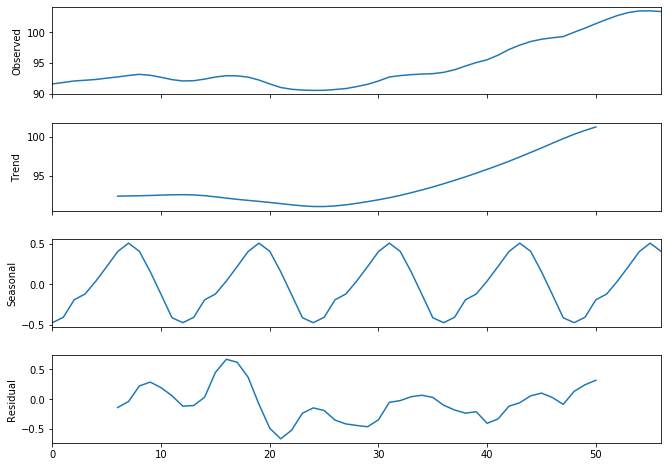

In [3]:
#%% Trend, Seasonality 확인
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

result = sm.tsa.seasonal_decompose(df['Price'], model='additive', freq=12)
result.observed
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10,7)

plt.savefig('서울_seasonal_decompose.png')

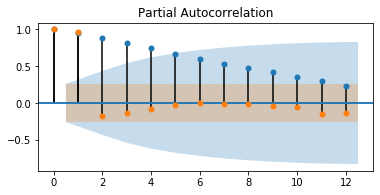

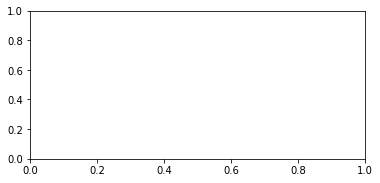

In [7]:
##ACF, PACF
import statsmodels.api as sm
fig = plt.figure(figsize=(6,6))
axl = fig.add_subplot(2,1,2)
fig = sm.graphics.tsa.plot_acf(df["Price"], lags=12, ax=axl)

fig1 = plt.figure(figsize=(6,6))
ax1 = fig1.add_subplot(2,1,2)
fig1 = sm.graphics.tsa.plot_pacf(df["Price"], lags=12, ax=axl)

In [9]:
#%% Modeling
from statsmodels.tsa.arima_model import ARIMA
import itertools
from tqdm import tqdm

p = range(0,3)
d = range(1,2)
q = range(0,6)

pdq = list(itertools.product(p,d,q))

aic = []
params = []

with tqdm(total = len(pdq)) as pg:
    for i in pdq:
        pg.update(1)
        try:
            model = ARIMA(df["Price"], order=(i))
            model_fit = model.fit()
            aic.append(round(model_fit.aic, 2))
            params.append((i))
        except:
            continue
optimal = [(params[i],j) for i,j in enumerate(aic) if j == min(aic)]
model_opt = ARIMA(df["Price"], order = optimal[0][0])
model_opt_fit = model_opt.fit()
print(model_opt_fit.summary())

fore = model_fit.forecast(steps=5)
print(fore)

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:04<00:00,  3.80it/s]


                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                   56
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  25.773
Method:                       css-mle   S.D. of innovations              0.150
Date:                Wed, 18 Jan 2023   AIC                            -43.546
Time:                        09:35:32   BIC                            -35.445
Sample:                             1   HQIC                           -40.406
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1954      0.104      1.878      0.066      -0.008       0.399
ar.L1.D.Price     1.2759      0.116     11.003      0.000       1.049       1.503
ar.L2.D.Price    -0.4630      0.116     